In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
Univ=pd.read_csv("/content/Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Normalization/Standardization function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_Univ_df=scaler.fit_transform(Univ.iloc[:,1:])
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

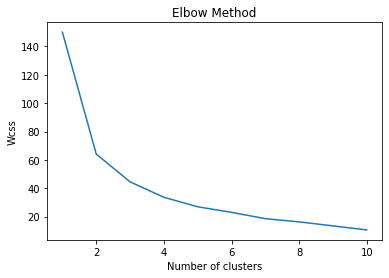

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,random_state=0)
  kmeans.fit(scaled_Univ_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()


In [ ]:
wcss

[150.0,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.9536816278831,
 23.028199078329926,
 18.56891703085987,
 16.301664640974554,
 13.47880438976081,
 10.640545447539141]

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_Univ_df)

In [ ]:
predict

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [ ]:
clusters_new=KMeans(n_clusters=3,random_state=0)
new_predict=kmeans.fit_predict(scaled_Univ_df)

In [ ]:
new_predict

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [ ]:
Univ["clusterid_new"]=new_predict

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [ ]:
Univ.groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000


In [ ]:
Univ[Univ["clusterid_new"]==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
2,CMU,1260,62,59,9,25026,72,0
4,Cornell,1280,83,33,13,21864,90,0
7,Georgetown,1255,74,24,12,20126,92,0
11,Northwestern,1260,85,39,11,28052,89,0
12,NotreDame,1255,81,42,13,15122,94,0
18,UCBerkeley,1240,95,40,17,15140,78,0
19,UChicago,1290,75,50,13,38380,87,0
20,UMichigan,1180,65,68,16,15470,85,0
21,UPenn,1285,80,36,11,27553,90,0
22,UVA,1225,77,44,14,13349,92,0


In [ ]:
Univ[Univ["clusterid_new"]==0].shape[0]

10

In [ ]:
Univ[Univ["clusterid_new"]==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
3,Columbia,1310,76,24,12,31510,88,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
8,Harvard,1400,91,14,11,39525,97,2
10,MIT,1380,94,30,10,34870,91,2
14,Princeton,1375,91,14,8,30220,95,2
16,Stanford,1360,90,20,12,36450,93,2
24,Yale,1375,95,19,11,43514,96,2


In [ ]:
Univ[Univ["clusterid_new"]==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1
